In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/housing.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

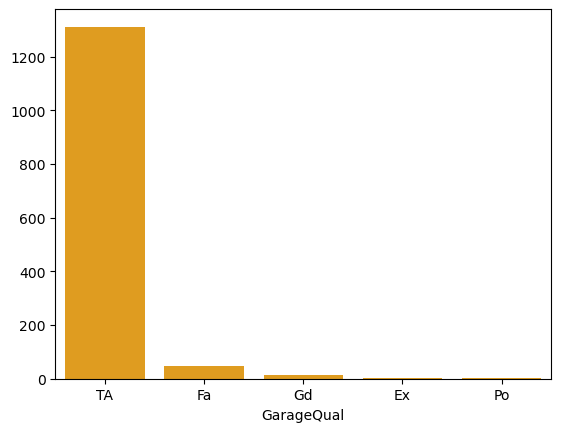

In [5]:
sns.barplot(x=df['GarageQual'].value_counts().index,
           y=df['GarageQual'].sort_values(ascending=False).value_counts().values,
           color='orange')
plt.show()

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


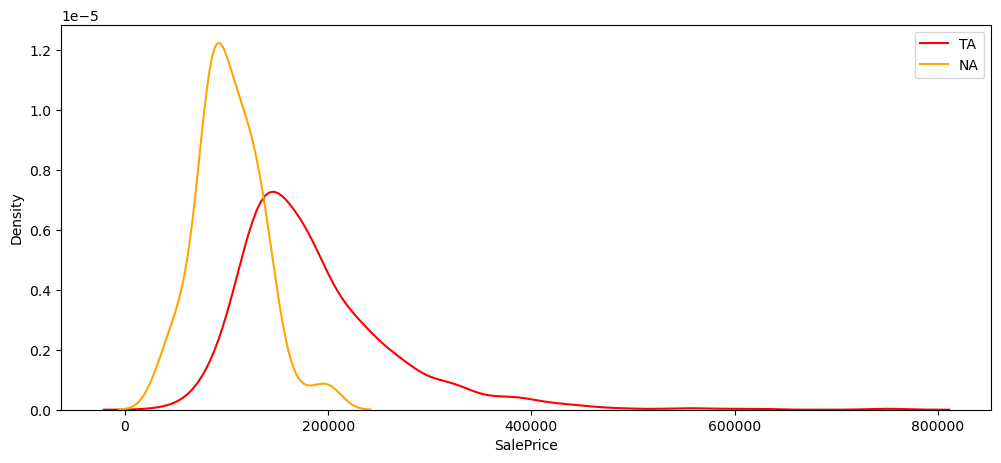

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))
sns.kdeplot(df[df['GarageQual'] == 'TA']['SalePrice'], legend='TA', color='red', label='TA',ax=ax)
sns.kdeplot(df[df['GarageQual'].isnull()]['SalePrice'], legend='TA', color='orange', label='NA', ax=ax)
ax.legend()
plt.show()

In [8]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']
df.fillna({'GarageQual':'TA'}, inplace=True)

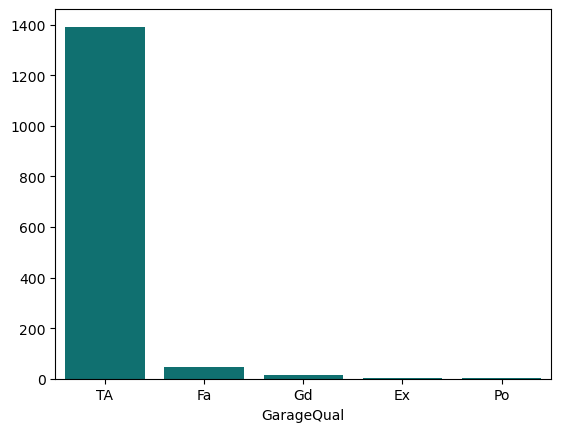

In [9]:
sns.barplot(x=df['GarageQual'].value_counts().index,
           y=df['GarageQual'].sort_values(ascending=False).value_counts().values,
           color='teal')
plt.show()

Text(0.5, 1.0, 'GarageQual')

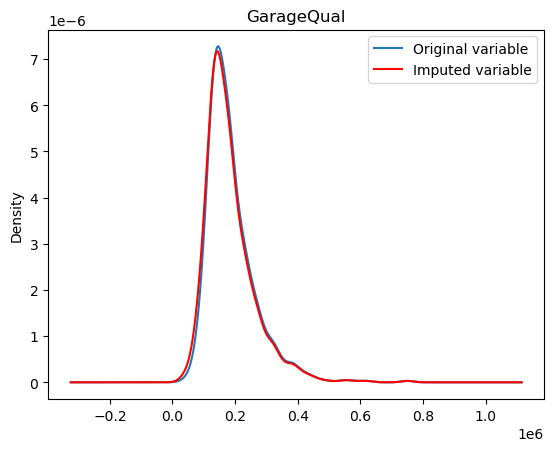

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

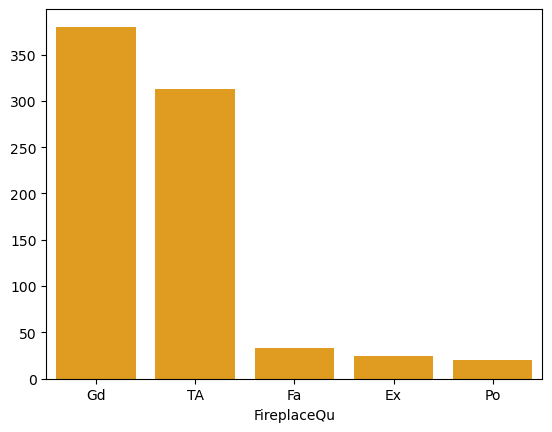

In [11]:
sns.barplot(x=df['FireplaceQu'].value_counts().index,
           y=df['FireplaceQu'].sort_values(ascending=False).value_counts().values,
           color='orange')
plt.show()

In [12]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


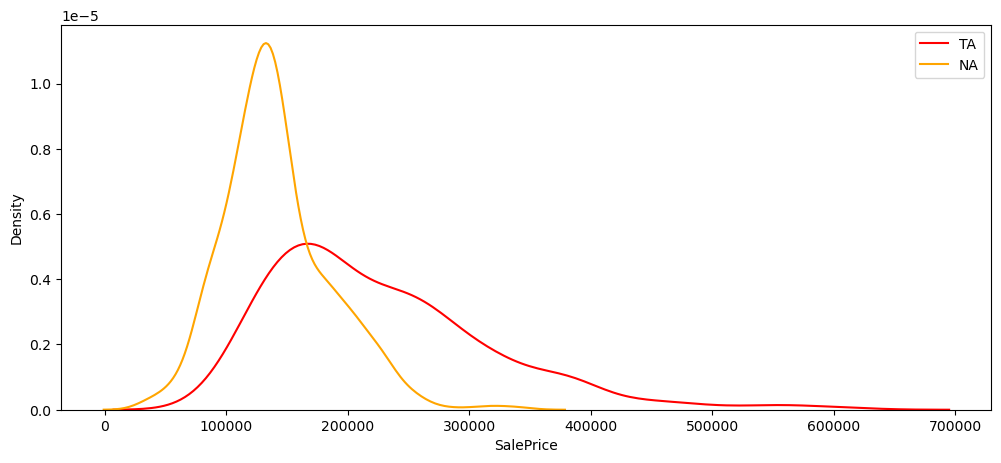

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))
sns.kdeplot(df[df['FireplaceQu'] == 'Gd']['SalePrice'], legend='TA', color='red', label='TA',ax=ax)
sns.kdeplot(df[df['FireplaceQu'].isnull()]['SalePrice'], legend='TA', color='orange', label='NA', ax=ax)
ax.legend()
plt.show()

In [14]:
temp = df[df['FireplaceQu'] == 'TA']['SalePrice']
df.fillna({'FireplaceQu':'TA'}, inplace=True)

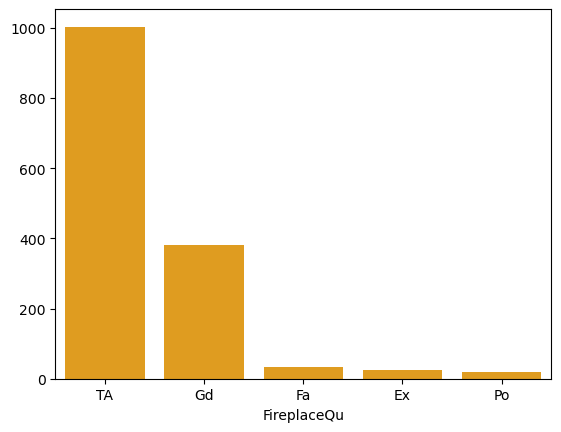

In [15]:
sns.barplot(x=df['FireplaceQu'].value_counts().index,
           y=df['FireplaceQu'].sort_values(ascending=False).value_counts().values,
           color='orange')
plt.show()

Text(0.5, 1.0, 'FireplaceQu')

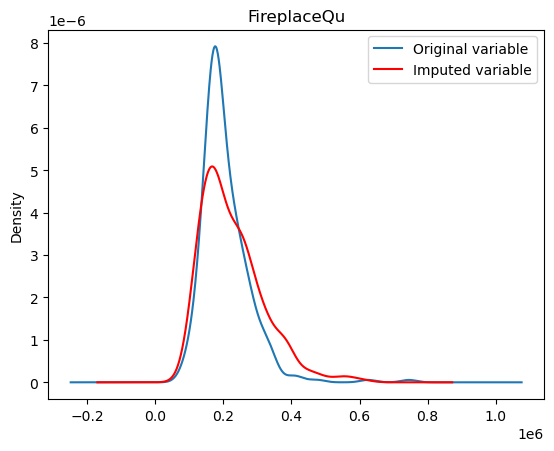

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(strategy='most_frequent', fill_value='Missing')

In [28]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [33]:
imputer.statistics_

array(['TA', 'TA'], dtype=object)